## sentdex - 딥러닝 튜토리얼

파이썬 & 텐서플로우 버전 확인

In [2]:
from platform import python_version
print(python_version())

3.7.9


In [3]:
import tensorflow as tf

tf.__version__

C:\Users\hewas\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hewas\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hewas\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hewas\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

'1.14.0'

오류 숨기기

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

뉴럴 네트워크 짜기
- mnist (손글씨) 데이터셋 사용

In [5]:
mnist = tf.keras.datasets.mnist  # 0부터 9까지의 손글씨 (28x28 이미지)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))  # 인풋 레이어
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))  # dense 레이어 (128개 뉴런)
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))  # 10개의 아웃풋 (softmax는 확률) - 0부터 9까지의 숫자니까

model.compile(optimizer = 'adam',  
             loss = 'sparse_categorical_crossentropy',    # 뉴럴 네트워크는 Acc가 아니라 loss를 최소화하는 방식
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 3)

## 지금까진 오버피팅 ##

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/3
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2630 - acc: 0.9226
Epoch 2/3
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1083 - acc: 0.9667
Epoch 3/3
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0735 - acc: 0.9772


In [6]:
## validation loss 구하기
import numpy as np
#x_test = np.array(x_test)
#y_test = np.array(y_test)

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.0944 - acc: 0.9681
0.09443665533997118 0.9681


이미지를 정규화하면 어떻게 되는가?

<function matplotlib.pyplot.show(close=None, block=None)>

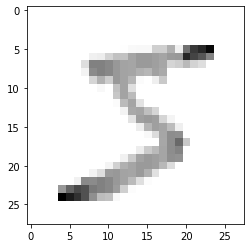

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show
# print(x_train[0])

.model 형식으로 모델 저장

In [8]:
model.save('epic_num_reader.model')

In [9]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
predictions = new_model.predict([x_test])

In [11]:
print(predictions)

[[3.4701409e-07 1.5788500e-07 2.4879482e-05 ... 9.9952710e-01
  4.9204164e-06 1.0920742e-05]
 [9.1942559e-10 1.4352874e-04 9.9985313e-01 ... 4.3917947e-08
  1.9918193e-08 1.5863215e-12]
 [3.9019476e-08 9.9996293e-01 7.8019129e-06 ... 6.4461456e-06
  1.6653226e-05 1.3756957e-07]
 ...
 [4.2142040e-10 1.5189499e-07 5.3558002e-10 ... 1.3202134e-06
  2.2609952e-06 2.2280008e-05]
 [1.2271060e-07 3.1176210e-08 9.6503106e-10 ... 3.7719474e-08
  2.7417569e-04 1.3878799e-10]
 [1.1706074e-07 1.0553038e-09 8.0692457e-09 ... 1.9989999e-10
  5.0732595e-08 5.7950539e-10]]


예측 결과는?
- softmax를 썼기 때문에 결과는 확률로 나옴

In [12]:
## 예측하기

import numpy as np
print(np.argmax(predictions[0]))

7


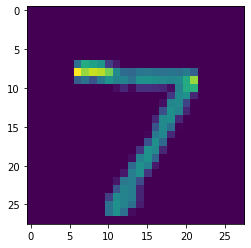

In [13]:
plt.imshow(x_test[0])
plt.show()